# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [81]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

## Load data 

In [82]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 15)

In [83]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [84]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [85]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [86]:
df['sex'].replace({'male': 1,'female':0},inplace=True)
df['target'].replace({'yes':1, 'no': 0},inplace=True)

In [87]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

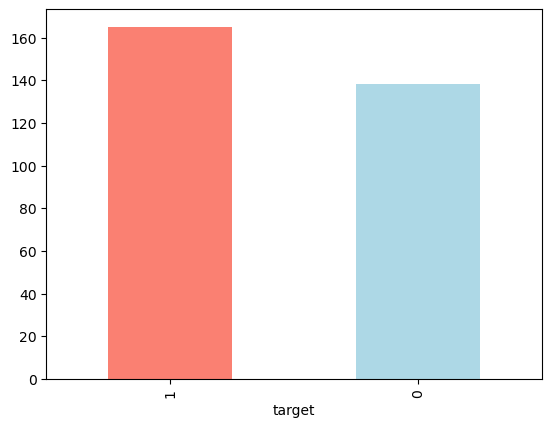

In [88]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [90]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.348123,0.689420,0.965870,131.679181,246.177474,0.146758,0.518771,149.880546,0.331058,1.054266,1.392491,0.730375,2.320819,0.546075
std,9.182042,0.463523,1.033114,17.658077,51.405545,0.354470,0.527162,22.638525,0.471399,1.173169,0.618946,1.029862,0.613331,0.498724
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex 

In [93]:
df.sex.value_counts()

sex
1    202
0     91
Name: count, dtype: int64

In [94]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,23,110
1,68,92


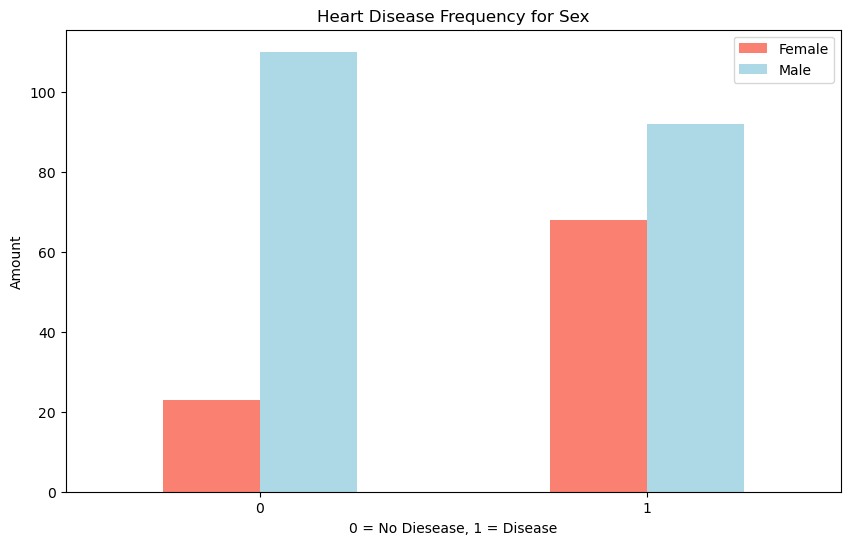

In [95]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

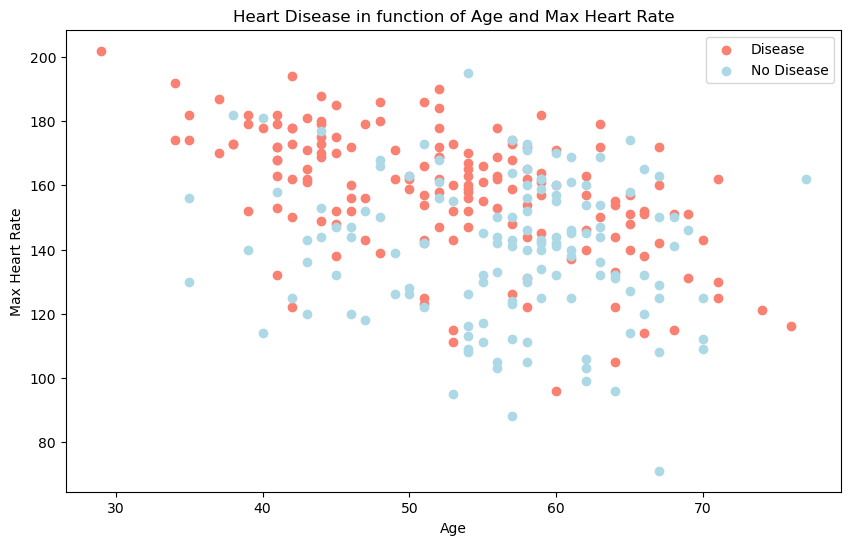

In [96]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

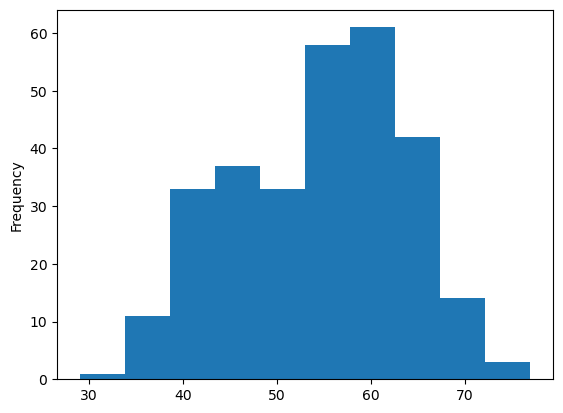

In [97]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [98]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,101,37
1,9,41
2,16,66
3,7,16


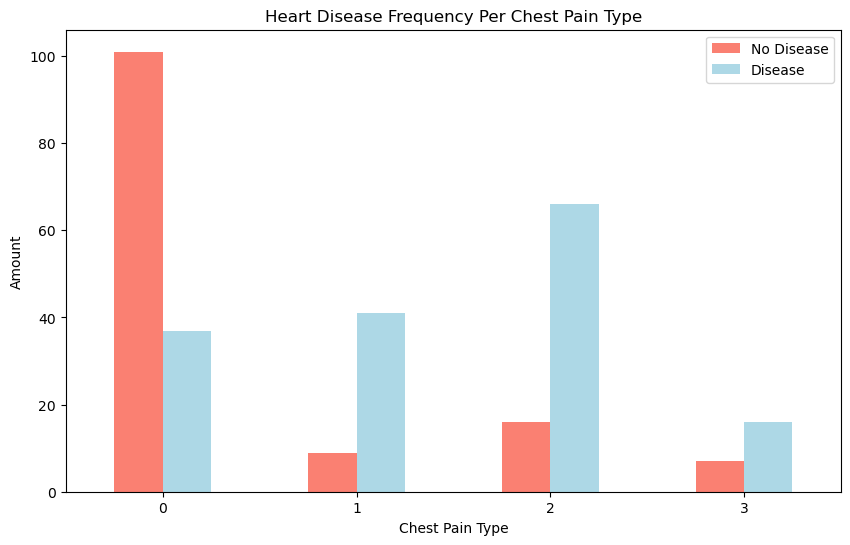

In [99]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [100]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [101]:
df_int = df.select_dtypes(include=['int','float','bool']).columns.to_list()

(14.5, -0.5)

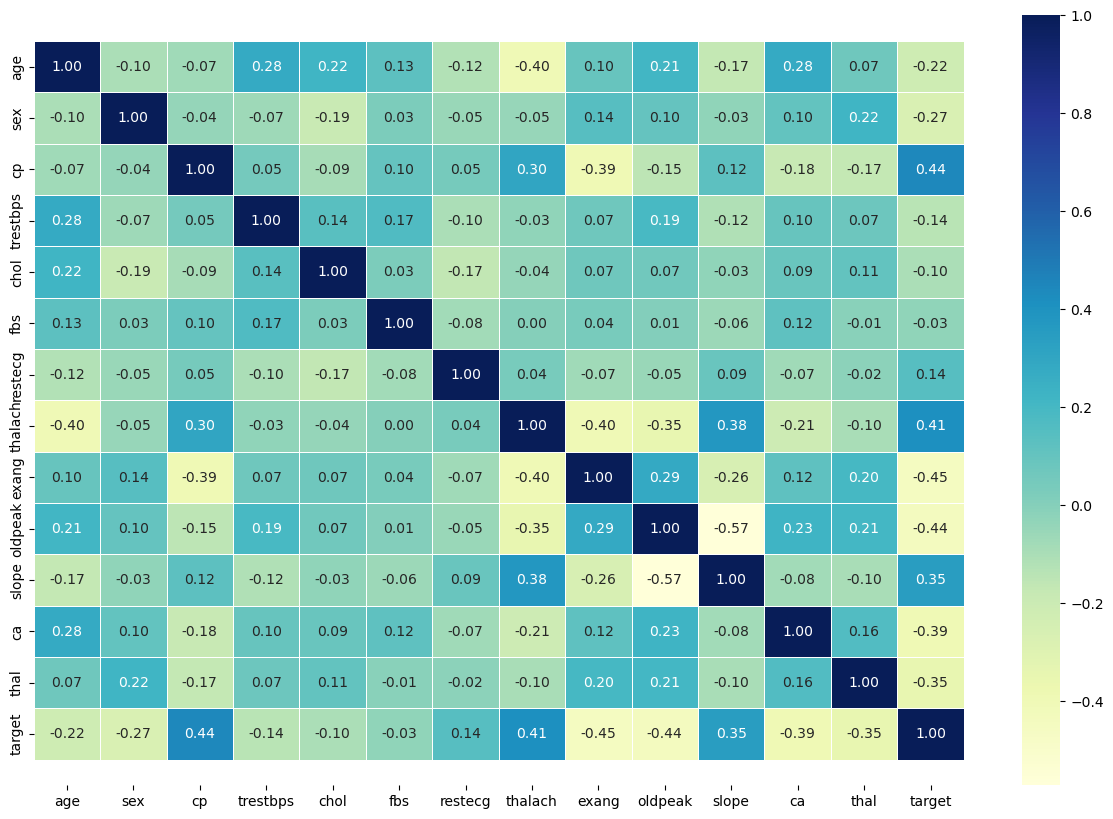

In [102]:
# Let's make our correlation matrix a little prettier
corr_matrix = df[df_int].corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling 

In [103]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [104]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [105]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3


In [106]:
y

0      1
1      1
2      1
3      1
5      1
      ..
296    0
298    0
299    0
300    0
302    0
Name: target, Length: 293, dtype: int64

In [107]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [108]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,1,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,58,1,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,64,1,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,51,1,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,51,1,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,60,1,2,140.0,185.0,0,0,155.0,0,3.0,1,0,2
74,43,0,2,122.0,213.0,0,1,165.0,0,0.2,1,0,2
110,64,0,0,180.0,325.0,0,1,154.0,1,0.0,2,0,2
278,58,0,1,136.0,319.0,1,0,152.0,0,0.0,2,2,2


In [109]:
y_train, len(y_train)

(217    0
 236    0
 233    0
 76     1
 27     1
       ..
 194    0
 74     1
 110    1
 278    0
 106    1
 Name: target, Length: 234, dtype: int64,
 234)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [110]:
df['sex'].replace({'male': 1,'female':0},inplace=True)

In [111]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [113]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

c:\Users\mahes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

### Model Comparison

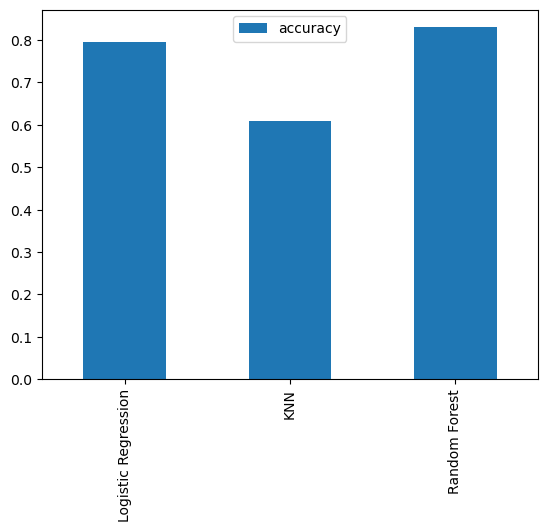

In [114]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [115]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [116]:
train_scores

[1.0,
 0.7863247863247863,
 0.7564102564102564,
 0.7393162393162394,
 0.7606837606837606,
 0.7478632478632479,
 0.7478632478632479,
 0.7393162393162394,
 0.7393162393162394,
 0.7008547008547008,
 0.7136752136752137,
 0.6923076923076923,
 0.6709401709401709,
 0.6837606837606838,
 0.6709401709401709,
 0.6752136752136753,
 0.6794871794871795,
 0.6666666666666666,
 0.6709401709401709,
 0.6709401709401709]

In [117]:
test_scores

[0.6271186440677966,
 0.576271186440678,
 0.6440677966101694,
 0.6440677966101694,
 0.6101694915254238,
 0.6610169491525424,
 0.6779661016949152,
 0.6440677966101694,
 0.6440677966101694,
 0.6610169491525424,
 0.7288135593220338,
 0.6779661016949152,
 0.6949152542372882,
 0.711864406779661,
 0.711864406779661,
 0.711864406779661,
 0.6949152542372882,
 0.711864406779661,
 0.7288135593220338,
 0.7288135593220338]

Maximum KNN score on the test data: 72.88%


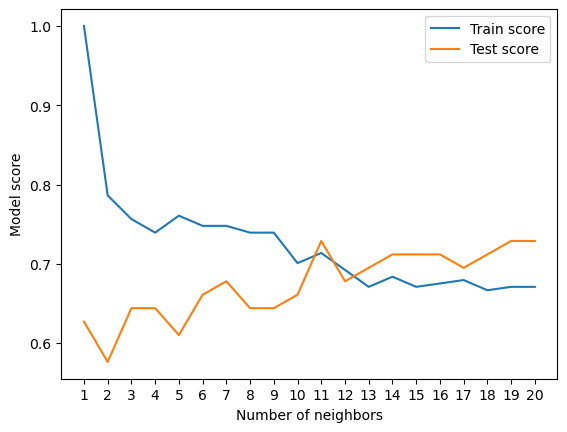

In [118]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [119]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [120]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [121]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [122]:
rs_log_reg.score(X_test, y_test)

0.8135593220338984

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [123]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [124]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [125]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8305084745762712

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [126]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [127]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [128]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7966101694915254

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [129]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [130]:
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [131]:
y_test

87     1
268    0
47     1
182    0
148    1
129    1
234    0
122    1
10     1
94     1
152    1
283    0
35     1
289    0
228    0
80     1
48     1
6      1
238    0
251    0
128    1
245    0
287    0
105    1
78     1
279    0
282    0
113    1
63     1
208    0
44     1
59     1
293    0
121    1
62     1
170    0
290    0
117    1
164    1
66     1
151    1
69     1
277    0
163    1
187    0
32     1
24     1
26     1
285    0
123    1
253    0
82     1
19     1
178    0
220    0
183    0
189    0
173    0
7      1
Name: target, dtype: int64

In [134]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[13 12]
 [ 0 34]]


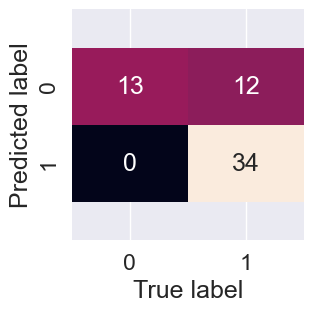

In [135]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [136]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.74      1.00      0.85        34

    accuracy                           0.80        59
   macro avg       0.87      0.76      0.77        59
weighted avg       0.85      0.80      0.78        59



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [137]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [138]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [139]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.83050847, 0.89830508, 0.89830508, 0.87931034, 0.74137931])

In [140]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8495616598480421

In [141]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8258542283310085

In [142]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.925

In [143]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8719158915501148

In [153]:
cv_precision, cv_recall

(0.8258542283310085, 0.925)

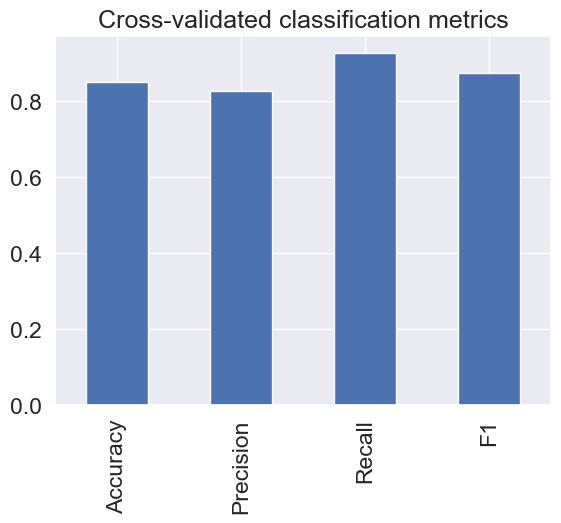

In [144]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [145]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [146]:
# Check coef_
clf.coef_

array([[ 0.01065427, -0.6532493 ,  0.65690976, -0.01269301, -0.00121961,
        -0.00286654,  0.2462822 ,  0.02315276, -0.74256653, -0.55337231,
         0.34893074, -0.69190446, -0.57409586]])

In [147]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [148]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.01065426922081309,
 'sex': -0.6532493015326257,
 'cp': 0.6569097640883107,
 'trestbps': -0.012693010965574812,
 'chol': -0.001219610123305186,
 'fbs': -0.0028665352172490086,
 'restecg': 0.2462822024029512,
 'thalach': 0.023152756816641168,
 'exang': -0.7425665305842124,
 'oldpeak': -0.5533723083216773,
 'slope': 0.34893074144503594,
 'ca': -0.6919044638298388,
 'thal': -0.5740958562424883}

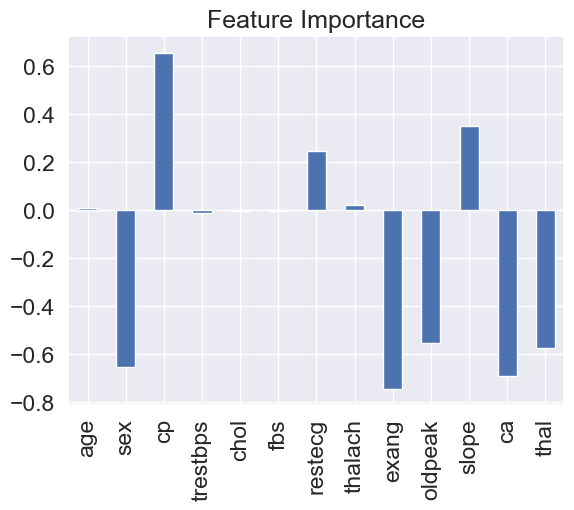

In [149]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [150]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,23,68
1,110,92


In [151]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,88,48
2,33,103


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart